# Machine Learning
### Astro Code Coffee
** 1 Nov 2017<br> **
** Rachel Smullen **

Today, I just want to give you some basic tips and tricks for using the Python machine learning package `scikit-learn`.  I'll give examples of basic methods regarding supervised methods.  There's a lot more that the package can do, but it is waaaay more than I can fit in an hour (even this is probably a bit much for an hour).

The resource that I'll be working from is the webpage of my ML class, which you can find [here](https://leonpalafox.github.io/MLClass/).  Leon has a ton of beginner resources that you may find helpful.

The `scikit-learn` documentation can be found [here](http://scikit-learn.org/stable/index.html).

![](http://scikit-learn.org/stable/_static/ml_map.png) 
[The image above](http://scikit-learn.org/stable/tutorial/machine_learning_map/index.html) is a flow chart that will help you get started choosing a place to start depending on your problem.  The webpage has links overlaid for faster navigation.

**Terminology:**
* Features: the things that we're asking our algorithm to fit.  In $y(x)=x$, $x$ is a feature.
* Classes: the categories to which our algorithm assigns items.  If we're talking about animals, our classes could be cats, dogs, and horses.

### Linear Regression

One of the nice things you can do with `scikit-learn` is linear regression, or fitting a continuous function to a set of data.  Yes, I know SciPy has things like `polyfit`, but with `scikit-learn`, we can trivially perform multi-dimensional regression for arbitrarily complex functions.  Regression is one of the simplest forms of supervised learning where we only have one "class" that we're fitting to.

In [1]:
## I'm a lazy programmer; get over it. :)
from pylab import *
import numpy,matplotlib
%matplotlib inline

The linear model is the simplest form of regression we can use.

In [39]:
from sklearn import linear_model # Scikit learn library that implements generalized linear models

# Let's define our linear model
lr = linear_model.LinearRegression() #In sklearn we define an object as our ML operator
print(lr)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)


In [3]:
# for printing convenience
def print_equtn(lr):
    try: inter=lr.intercept_[0]
    except: inter=lr.intercept_
    outstr=str(inter)+' '; ncoeff=shape(lr.coef_)[-1]
    for i in range(ncoeff): outstr+=' + '+str(lr.coef_[0,i])+' x^'+str(i+1)
    print('y =',outstr)
    return

In [4]:
# Now let's create data
x=arange(0,10.1,1)[:,None] # We need to make sure our vector is in 2d for the fitting routine
y=x**4.

print(shape(x),shape(y))

(11, 1) (11, 1)


In [5]:
# We can fit our data using the linear regression operator method fit.
# This just fits a line to our fata
lr.fit(x,y)
# We can then find the coefficients for our fit with lr.coef_ and lr.intercept_

print_equtn(lr)

y = -1977.0  + 856.0 x^1


In [6]:
# We can then predict values based on our linear fit
y_predict=lr.predict(x)

In [7]:
# We can try not fitting the intercept.
lr.fit_intercept=False
lr.fit(x,y)

print_equtn(lr)

y_predict2=lr.predict(x)

y = 0.0  + 573.571428571 x^1


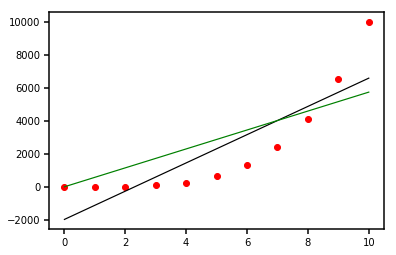

In [8]:
plot(x,y,'ro')
plot(x,y_predict,'k',label='Fitting intercept')
plot(x,y_predict2,'g',label='No Intercept')

Well, that's not a great fit on either line.  Obviously, we need a higher order polynomial.  We can do this by adding _features_ to our fit.  Features are characteristics of our data.  For instance, if we wanted to do a linear regression on used car prices, our features might include age, price when new, and mileage.  For this polynomial fit, our features will include higher order terms such as $x$, $x^2$, and $x^3$.

In [9]:
# We're going to use a nice sklearn package to add polynomail features to our data
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(4, include_bias = False)  # we want to 4th order.  
#The bias term would add a column of x^0 if True
x_4 = poly.fit_transform(x)
print(x_4[-1]) # we now have x^1, x^2, x^3, and x^4 as features

[    10.    100.   1000.  10000.]


In [10]:
lr.fit_intercept=True
lr.fit(x_4,y)

print_equtn(lr)

y_predict2=lr.predict(x_4)

y = -9.09494701773e-13  + 1.63748720142e-12 x^1 + -3.49555740245e-13 x^2 + 4.20640735779e-14 x^3 + 1.0 x^4


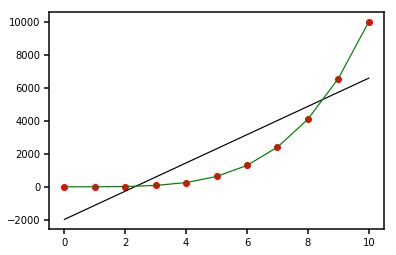

In [11]:
plot(x,y,'ro')
plot(x,y_predict,'k',label='Fitting intercept')
plot(x,y_predict2,'g',label='With poly features')

From above, we can see that the fourth order features produce a pretty good fit.  Can we get a better fit by adding even more polynomial features?

In [12]:
# Let's try adding fifth order features
poly = PolynomialFeatures(5, include_bias = False) 
x_5 = poly.fit_transform(x)

print(shape(x_5)) # we now have x^1, x^2, x^3, x^4, and x^5 as features

lr.fit_intercept=True
lr.fit(x_5,y)

print_equtn(lr)

(11, 5)
y = 1.21872290038e-10  + 1.8714652509e-12 x^1 + -1.04815073899e-12 x^2 + 2.37268994276e-13 x^3 + 1.0 x^4 + -5.41637750464e-15 x^5


We see that adding in more features didn't change the goodness of our fit.  What about if we have noisy data?

y = -724.887218995  + 875.152006641 x^1 + -383.926283381 x^2 + 62.7349671041 x^3 + -2.16866407358 x^4


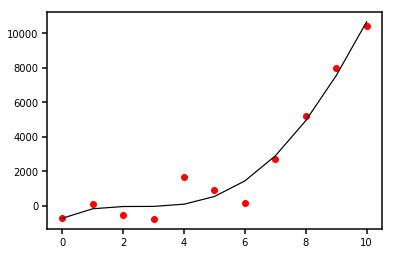

In [13]:
y_noise=numpy.random.rand(len(y),1)*3000-3000/2
y_noisy=y+y_noise

poly = PolynomialFeatures(4, include_bias = False) 
x_4 = poly.fit_transform(x)

lr.fit_intercept=True
lr.fit(x_4,y_noisy)

print_equtn(lr)

y_predict2=lr.predict(x_4)

plot(x,y_noisy,'ro')
plot(x,y_predict2,'k')


Another type of regression we can use is called Ridge regression.  The major parameter that we pass is `alpha`, the regularization strength, which impacts the "flexibility" of the  fit. An alpha of 0 is the standard least squares fitting. 

[[ 853.12840487 -374.56780514   61.37768103   -2.10520916]] [-715.19895458]
[[ 2.43513387 -2.84213589  6.53961668  0.48856742]] [-365.13078224]


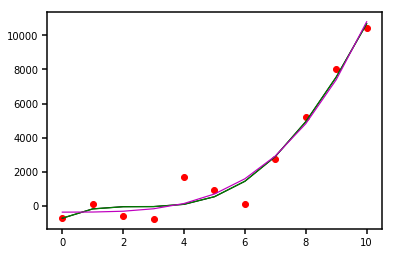

In [14]:
from sklearn.linear_model import Ridge

lr = Ridge(alpha=.01) #Is the alpha that affects the weights!!
lr.fit(x_4,y_noisy)
print(lr.coef_, lr.intercept_)
y_predictr = lr.predict(x_4)

lr = Ridge(alpha=100)
lr.fit(x_4,y_noisy)
print(lr.coef_, lr.intercept_)
y_predictr2 = lr.predict(x_4)

plot(x,y_noisy,'ro')
plot(x,y_predict2,'k',label='Linear')
plot(x,y_predictr,'g',label='Ridge alpha=0.001')
plot(x,y_predictr2,'m',label='Ridge alpha=100')

### Binary Classification and Validation Methods
The next step in regression is called logistic regression, which is a type of binary classification.  This means that we decide if our data belong in one of two pre-defined classes, if our data are either true or false.  This is what I think most people will want to use ML for: determining to which class of objects a data point belong.  We'll start with one of the built-in data sets in `scikit-learn`.

In [15]:
from sklearn.datasets import load_breast_cancer

# This is a data set that will help us predict the presence of breast cancer given certain cell nuclei properties 
data=load_breast_cancer()

print("Num samples", len(data.data))

# These are the 30 features our data have
print("Features",data.feature_names)

# These are the samples that have benign and malignant classifications
print(data.target_names[0],len(where(data.target==0)[0]),data.target_names[1],len(where(data.target==1)[0]))

Num samples 569
Features ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
malignant 212 benign 357


Let's now break our data into $x$ (features) and $y$ (what we want to be able to predict) like we did above.

In [16]:
x=data.data
y=data.target

Now, let's pull the most vanilla classifier, SVC (support vector classifier), and see what it does.  The SVC method uses a support vector machine (SVM) method to find the optimal "hyperplane" for our set of features.  This means that the SVM is trying to draw a "N-feature"- dimensional plane such that members from different classes are as far from the plane as possible.

![](https://docs.opencv.org/2.4/_images/optimal-hyperplane.png)

In [17]:
# This is one of the easiest out-of-the-box classifiers
from sklearn.svm import SVC

classifier = SVC() # Define the operator

#Then just like before
classifier.fit(x,y)

y_predict = classifier.predict(x)
print(sum(y_predict - y)) #If each prediction is the same, this should be zero

print(classifier)

0
SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


What have we done here?  We've trained our classifier on the entire sample, so of course it will be perfect; we've already given it all of the data!  That doesn't do us much good, as what happens when we add a new data point?  How well will it do? 

We're going to have to use validation methods to convince ourselves that our method is working.  The simplest is called "hold-out cross validation." In this, we split our data into two chunks.  We train on one and test on the other.  If you remember nothing else, **always use validation methods to make sure your algorithm is working the way you expect it to!**   As Dimitrios is fond of saying, garbage in, garbage out.  ML is a tool, not the end all and be all.  It is up to you to ensure it works correctly.

In [18]:
# The easiest way to implement hold-out CV is (unsurprisingly) using  built in methods 
from sklearn.model_selection import train_test_split
# this splits our data into two chunks
# random states are important for repeatability
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.3, random_state=30) 

In [19]:
# We now train our classifier on the training data set and predict it on the testing dataset
classifier.fit(xtrain,ytrain)

y_predict = classifier.predict(xtest)

In [20]:
# We can also use some built-in methods to test the accuracy of our classifier
from sklearn.metrics import accuracy_score
print(accuracy_score(ytest, y_predict)) 

0.637426900585


This means that our classifier, with the default parameteres, has a 64% accuracy.  I'm sure we can do better than that.  We should iterate over different parameters in our classifier to find the combination that gives us the best accuracy.  Specifically, the two things that will make the most difference are the `kernel` function used to compute the hyperplane and `gamma`, the sensitivity of the kernel to overfitting (if gamma is too large, you'll fit every data point perfectly, and this fit will be useless for any other data). 

To iterate over all interesting parameters, we'll use the Grid Search method.

In [21]:
from sklearn.model_selection import GridSearchCV
# create your parameters to iterate over as a dictionary
parameters = {'kernel':('linear', 'rbf','sigmoid'), 'gamma':logspace(-5,5,11)}

In [22]:
# You feed the grid search the classifier, the parameters to iterate over, and you can ask it to parallelize
# This may take a while if you're iterating over a lot of things
class_gridsearch = GridSearchCV(classifier, parameters, n_jobs = 4)
class_gridsearch.fit(xtrain, ytrain)

# This is the best classifier that the iteration found
print(class_gridsearch.best_estimator_)

new_classifier=class_gridsearch.best_estimator_

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1.0000000000000001e-05,
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)


In [23]:
new_classifier.fit(xtrain,ytrain)
y_predict = new_classifier.predict(xtest)
print(accuracy_score(ytest, y_predict))

0.953216374269


Wow! We increased our accuracy by over 30%!  What features are most important in determining the fit?  We can look at the `classifier.coef_` values (larger absolute values mean more importance).  For other classifiers, it may show up as `classifier.feature_importance_` or some other such name. Look at the method documentation for more.

Text(0.5,0,'Feature importance')

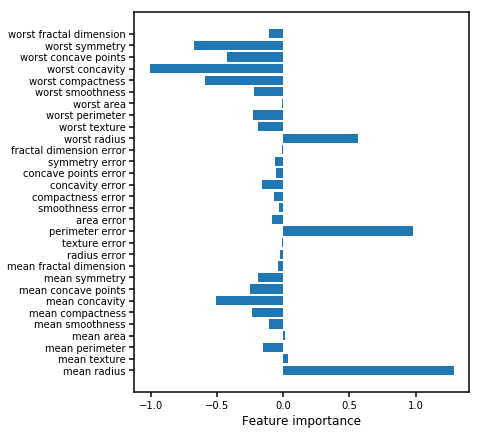

In [24]:
feat = ravel(new_classifier.coef_)
eyes = arange(len(feat)) + 0.5

figure(figsize=(6,7))
barh(eyes, feat, align='center')
yticks(eyes, tuple(data.feature_names))
xlabel("Feature importance")

From this, we can  see that the radius of the nucleus is the biggest indicator of malignant breast cancer, but other features like concavity contribute strongly to the fit. 


We can also look at the individual points.  How good is the classification for each point?

Text(0,0.5,'Distance from hyperplane')

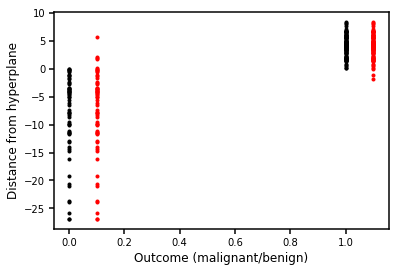

In [25]:
# For this, we can use the built in decision_function method.  This gives us the distance to the hyperplane.

plot(y_predict,new_classifier.decision_function(xtest),'k.') # predicted
plot(ytest+0.1,new_classifier.decision_function(xtest),'r.') # real
xlabel('Outcome (malignant/benign)')
ylabel('Distance from hyperplane')

Here, the black points close to zero are the ones that are the most suspicious. Indeed, the real classifications show that there are some pathalogical cases that we just won't be able to find with our classifier as-is.  However, we can ask our classifier to output probabilities of class membership so that we can be more strict in our class assignment.  

In [26]:
new_classifier.probability=True
new_classifier.fit(xtrain,ytrain)
y_predict = new_classifier.predict(xtest)
print(accuracy_score(ytest, y_predict))

0.953216374269


Text(0,0.5,'probability')

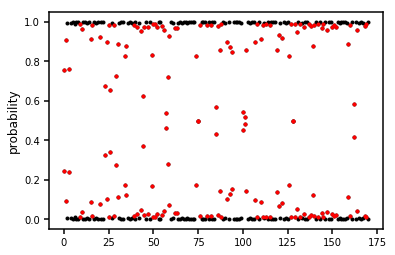

In [27]:
# This gives a n_class x n_sample array
# each row represents the class probability of malignant or benign for 
# every data point
probs=new_classifier.predict_proba(xtest)
plot(probs,'.k')

# do some masked array things to figure out 
import numpy.ma as ma
p=ma.masked_outside(probs, 1E-2, 1-1E-2)
plot(p,'r.')
ylabel('probability')

In the above plot, a perfect classification would have [0,1] or [1,0].  As you can see, most are somewhere in between.  We've overplotted all data that have more than a 1% error in red.  Depending on our situation, we might want to classify all of these differently.  For instance, in our breast cancer example, we might want to assume that anything with more than a 1% error is a malignant tumor.  It would be far worse to tell someone that the _don't_ have cancer when they actually do. Thus, this prediction can be a valuable tool to help us get secure classifications on the things we care most about.


We are now ready to apply this trained classifier to other unknown data.  We've characterized it's behavior for our problem, and we know several different ways to figure out just how good it is.

### Multi-class Classification


We can use almost all of the same ideas for a multi-class classification, where we have N arbitrary classes that our algorithm sorts into.

Caveats:
* This works best if your data set is balanced, meaning that you have roughly equal(ish) numbers of items in each class.
* At the very least, you need to have a few items of each class in both your training and testing sets.   If you don't, your method **will not** be reliable.

In [28]:
# Again, we'll use a built in scikit-learn dataset.
from sklearn.datasets import load_wine
# This is a data set that compares chemical properties of three different types of wine 
data=load_wine()

print("Num samples", len(data.data))

# These are the 13 features our data have
print("Features",data.feature_names)

# These are the samples that are different types of wine
print(data.target_names[0],len(where(data.target==0)[0]))
print(data.target_names[1],len(where(data.target==1)[0]))
print(data.target_names[2],len(where(data.target==2)[0]))

Num samples 178
Features ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
class_0 59
class_1 71
class_2 48


In [29]:
x=data.data
y=data.target

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.3, random_state=30)

#Here is another useful classifier
from sklearn.svm import LinearSVC
classifier = LinearSVC(random_state=30) # reset the operator

#Then just like before
classifier.fit(xtrain,ytrain)

y_predict = classifier.predict(xtest)
print(classifier.score(xtest,ytest))

0.925925925926


In [30]:
# And here's another, a tree method
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(random_state=30) # reset the operator

#Then just like before
classifier.fit(xtrain,ytrain)

y_predict = classifier.predict(xtest)
print(classifier.score(xtest,ytest))

0.944444444444


Woohoo!  This works pretty well out of the box. Let's investigate feature importance.

(0, 13.0)

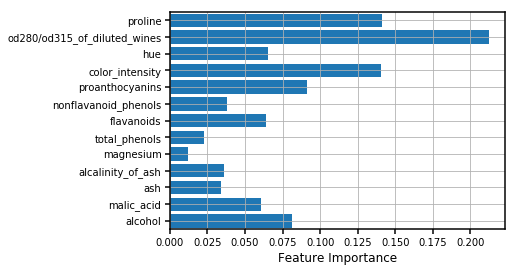

In [31]:
feat = classifier.feature_importances_
eyes = np.arange(len(feat)) + 0.5

barh(eyes, feat, align='center')
xlabel("Feature Importance")
yticks(eyes, tuple(data.feature_names))
grid(True)
ylim(0,max(eyes)+0.5)

Here, we can see that just a few of the features are very important, but, on the other hand, none of the features are not important at all.  As with before,  you can refine this fit by iterating over combinations of hyper-parameters in the classifier.

### Clustering
Another thing we can do, instead of rote classification, is to use clustering algorithms to find ways in which our data are related.  This is really useful for exploratory investigations; you can begin to learn what items might be related.  The most basic algorithm is called K-means, and it requires very little from the user other than a number of classes.  Note that the clusters are random, so it is up to you to find the real classes.

In [32]:
# This is KMeans for small numbers
from sklearn.cluster import MiniBatchKMeans
from sklearn.datasets import load_iris

clusterer = MiniBatchKMeans(random_state=10)

# Iris is another built in dataset
data=load_iris()
print("Num samples", len(data.data))

# These are the 4 features our data have
print("Features",data.feature_names)

# These are the samples that are different types of irises
print(data.target_names[0],len(where(data.target==0)[0]))
print(data.target_names[1],len(where(data.target==1)[0]))
print(data.target_names[2],len(where(data.target==2)[0]))


x=data.data

Num samples 150
Features ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
setosa 50
versicolor 50
virginica 50


In [33]:
## A plotting routine stolen from Leon
def plot_clusters(clusterer,n_clusters,X,labels):
    
    # Import metrics needed for plots
    from sklearn.metrics import silhouette_samples, silhouette_score   
    
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer.n_clusters=n_clusters
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.plasma(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.plasma(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='o',  lw=0, alpha=0.7,
                c=colors)

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1],
                marker='o', c="white", alpha=1, s=200)

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50)

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel(labels[0])
    ax2.set_ylabel(labels[1])

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')
    return

For n_clusters = 3 The average silhouette_score is : 0.536255542493


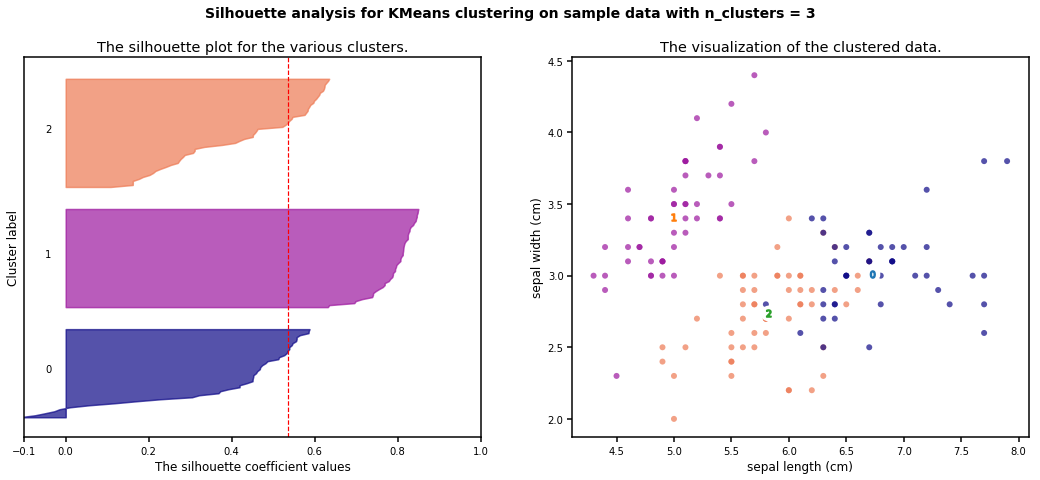

In [34]:
# We know that we should have three clusters for this data
plot_clusters(clusterer,3,x,[data.feature_names[0],data.feature_names[1]])

The silhouette is a metric that tells us about the distance of a point from the center of the cluster.  A value of 1 means a really good fit, and a value of -1 is really bad. We want to maximize the average silhouette score for the best fit.

For n_clusters = 4 The average silhouette_score is : 0.49595535837


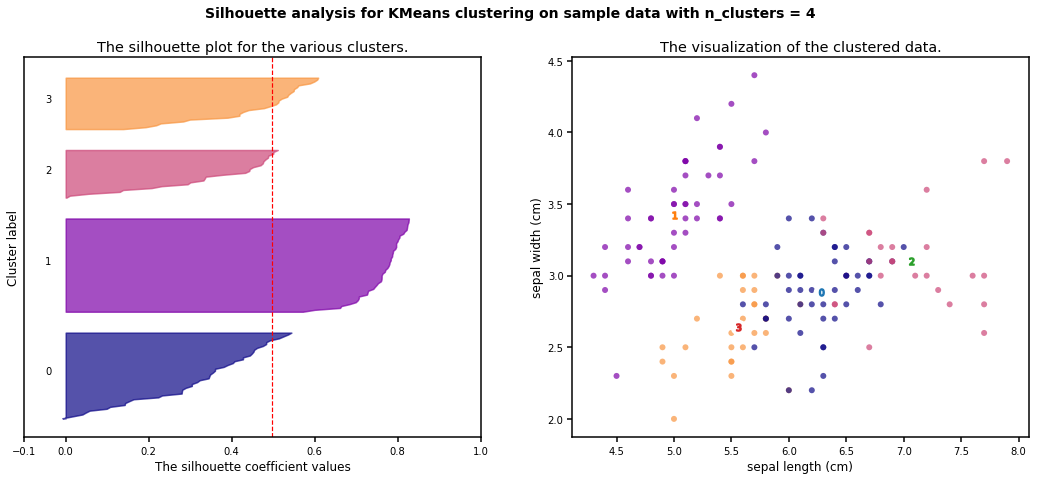

In [35]:
plot_clusters(clusterer,4,x,[data.feature_names[0],data.feature_names[1]])

For n_clusters = 5 The average silhouette_score is : 0.370274844798


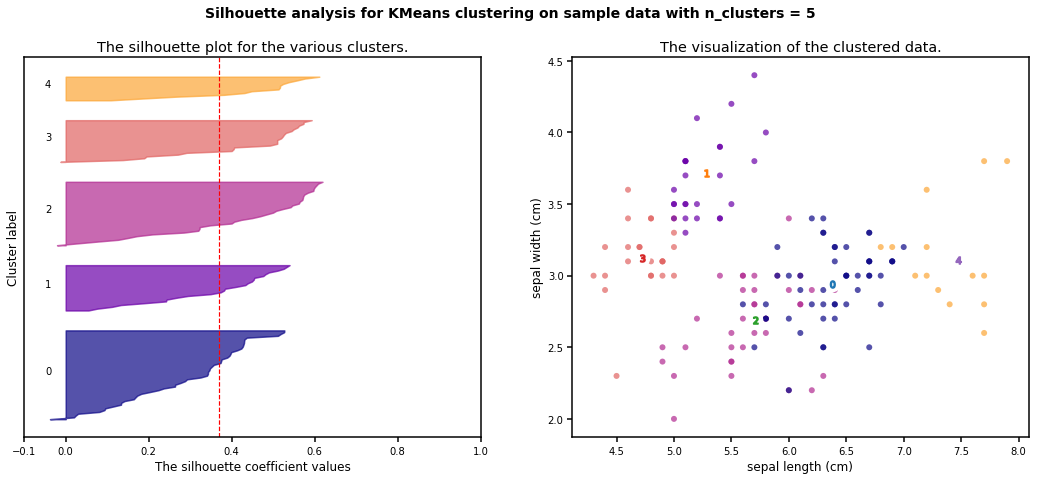

In [36]:
plot_clusters(clusterer,5,x,[data.feature_names[0],data.feature_names[1]])

We can see that three clusters definitely fits the data better. However, the cluster points are spread out all over the plot. 

Clustering algorithms suffer "the curse of dimensionality," meaning that to sample the same percentage of your feature space, you need larger and larger fractions of your data as you increase the number of features.  Part of the reason our clustering may not look good is that we have too many features.  We can use built-in PCA analysis to try to reduce our number of features. 

In [37]:
from sklearn.decomposition import PCA

x=data.data
# Let's try to reduce our data to 2 components-- half of the total number of features
n_components=2
pca = PCA(n_components=n_components)
x_pca = pca.fit_transform(x)

For n_clusters = 3 The average silhouette_score is : 0.58076234802


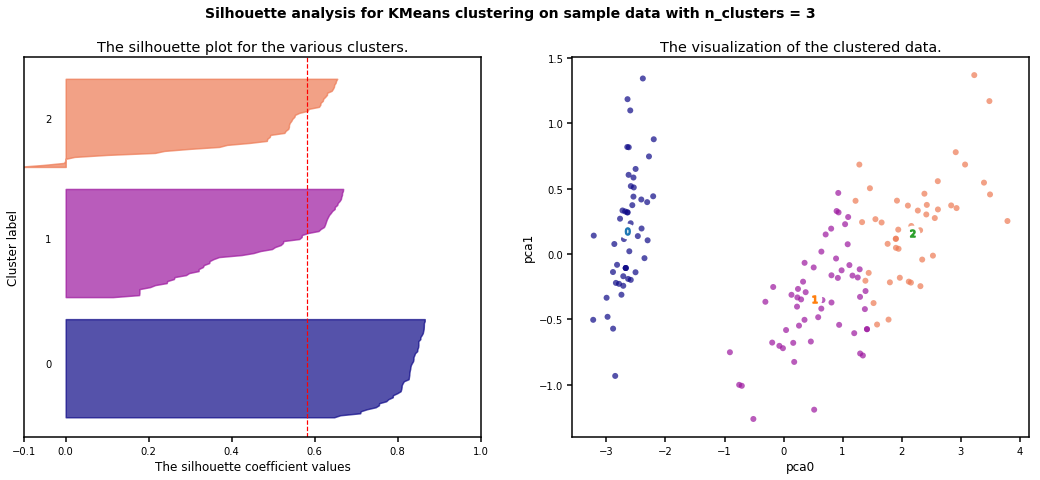

In [38]:
# and let's now run kmeans again
clusterer = MiniBatchKMeans(random_state=10)
plot_clusters(clusterer,3,x_pca,["pca0", "pca1"])

Now, our clusters are much more believable.  Our silhouette score went up a bit-- a positive sign--and they are much better spaced in our clustering plot. 

#### Fin
There are other things we can  do to help our algorithm that I haven't gone into today, such as data preprocessing or normalization.  We've barely scratched the surface of ML.  However, hopefully this gets you started enough that you can navigate the wealth of information on Google.